In [76]:
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
from growth.sweep.sweep import Sweep
from clones.validation.sweep import SweepBenchmark
from clones.visualization.settings import *
%matplotlib inline

In [77]:
figsize = (2, 2)
savedir = './graphics/synthetic/'
savefig = lambda fig, name: fig.savefig(join(savedir, '{:s}.pdf'.format(name)), dpi=400, rasterized=True, transparent=True)

In [3]:
ls ../../../data/synthetic/

aggregate.py    growth_example/ old/
build_sweep.py  landing/        sweeps/


# Culture growth example

In [78]:
from growth.sweep.simulation import GrowthSimulation
simulation = GrowthSimulation.load('../../../data/synthetic/growth_example/')

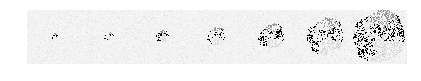

In [6]:
size = 1
min_gen = 5

# define grid
nrows = 1
ncols = simulation.min_population - min_gen + 1
fig = plt.figure(figsize=(ncols*size-0.2, nrows*size))
gs = GridSpec(nrows, ncols, wspace=0., hspace=0.)


# visualize first generation exceeding each population threshold
i = 0
simulations = []
for t, cells in enumerate(simulation.history):
    n = len(cells)    
    if np.log2(n) >= min_gen:
        ax = fig.add_subplot(gs[i])
        image = simulation.branch(t).generate_microscopy(0., 0., 0.)[1]
        image.render(ax=ax)
        i += 1
        min_gen += 1

In [ ]:
#savefig(fig, 'growth_strip')

# Varying recombination period

In [15]:
sweep = Sweep.load('../../../data/synthetic/sweeps/growth_conditions/')

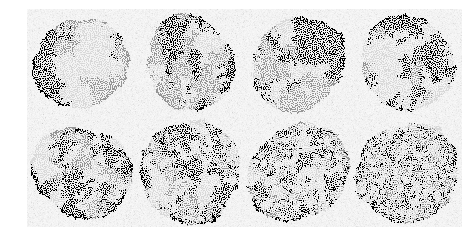

In [16]:
nrows = 2
ncols = 4
size = 2
row = 1

fig = plt.figure(figsize=(ncols*size-0.2, nrows*size))
gs = GridSpec(nrows, ncols, wspace=0., hspace=0.)
axes = [fig.add_subplot(gs[i]) for i in range(nrows*ncols)]
for i, ax in enumerate(axes):
    image = sweep[i+row*nrows*ncols].generate_microscopy(0., 0., 0.)[1]
    _ = image.render(ax=ax)

#savefig(fig, 'recombination_timing')

# Simulated cell growth trends

In [3]:
from clones.validation.growth import GrowthTrends

In [4]:
sweep_4gen = Sweep.load('../../../data/synthetic/sweeps/Sweep_181201_191516/')
sweep_2gen = Sweep.load('../../../data/synthetic/sweeps/Sweep_181201_191521/')
trends_4gen = GrowthTrends(sweep_4gen._results)
trends_2gen = GrowthTrends(sweep_2gen._results)

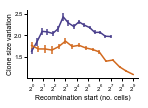

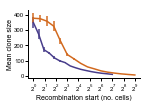

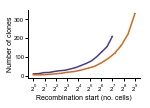

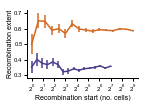

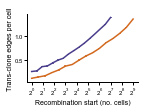

In [5]:
# plot each trend
for yvar in sorted(trends_4gen.ylabels.keys()):
    fig, ax = plt.subplots(figsize=(2., 1.25))
    _ = trends_4gen.plot_trend(yvar, ax=ax, color='darkslateblue')
    _ = trends_2gen.plot_trend(yvar, ax=ax, color='chocolate')
    #savefig(fig, yvar)

In [84]:
x = np.arange(10)

In [88]:
[x[10-i-1] for i in range(10)]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

# Fluroescence model

In [3]:
path = '../../../data/synthetic/sweeps/Sweep_181201_191516/'
sweep = Sweep.load(path)
benchmarks = SweepBenchmark.load(path)

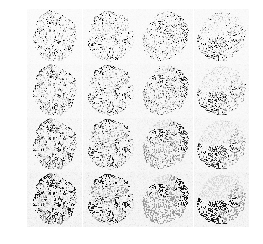

In [37]:
resolution = 4
size = 1
replicate_id = 0

ncols = sweep.num_periods // resolution
nrows = benchmarks.num_ambiguities // resolution

# create figure
fig = plt.figure(figsize=(ncols*size, nrows*size))
gs = GridSpec(nrows, ncols, wspace=0., hspace=0.)
axes = [[fig.add_subplot(gs[i*ncols+j]) for j in range(ncols)] for i in range(nrows)]

for i in range(nrows):    
    for j in range(ncols):

        # get indices and axis
        ax = axes[nrows-i-1][ncols-j-1]        
        ii = i*resolution
        jj = j*resolution
        
        # load simulation and benchmark
        simulation = sweep.batches[0, jj][replicate_id]
        benchmark = benchmarks.load_benchmark(jj, ii)
        
        # render image
        image = simulation.generate_microscopy(benchmark.ambiguity, 0., 0.)[1]
        _ = image.render(ax=ax)

savefig(fig, 'benchmarking_images_4x4')

In [4]:
from growth.measure.sampling import MultiLognormalSampler

0.9400000000000001
0.8200000000000001
0.7000000000000001
0.5800000000000001
0.4600000000000001
0.34
0.22000000000000003
0.1


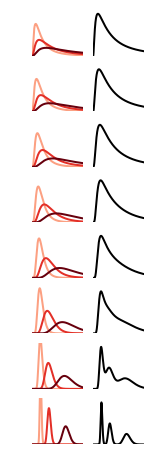

In [39]:
resolution = 2
size = 1
cmap = plt.cm.Reds

# create figure
nrows = benchmarks.num_ambiguities // resolution
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(size*2, nrows*size))
for i, ax_row in enumerate(axes):
    ii = (nrows-i-1)*resolution
    ambiguity = benchmarks.load_benchmark(0, ii).ambiguity
    sampler = MultiLognormalSampler(ambiguity)
    sampler.show_pdf(ax=ax_row[0], cmap=cmap, component_lw=2, include_composite=False)
    sampler.show_pdf(ax=ax_row[1], composite_lw=2, include_components=False)
    for ax in ax_row:
        if i != nrows-1:
            ax.set_xticks([])
        ax.axis('off')
        ax.set_xlim(0, 3)
        ax.set_ylim()
    ax_row[1].set_ylim(top=1.1*ax_row[1].dataLim.bounds[-1])
    print(ambiguity)

# savefig(fig, 'fluorescence_models')

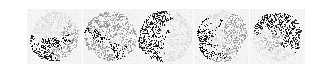

In [56]:
num_replicates = 5
size = 1

# create figure
fig = plt.figure(figsize=(num_replicates*size, size))
gs = GridSpec(1, num_replicates, wspace=0., hspace=0.)
axes = [fig.add_subplot(gs[i]) for i in range(num_replicates)]

# get indices and axis
i, j = 0, 0
ii = i*resolution
jj = j*resolution

replicate_ids = np.hstack(([0], np.random.randint(0, 50, size=num_replicates-1)))
for j in range(num_replicates):
    
    ax = axes[j]

    # load simulation and benchmark
    simulation = sweep.batches[0, jj][replicate_ids[j]]
    benchmark = benchmarks.load_benchmark(jj, ii)

    # render image
    image = simulation.generate_microscopy(benchmark.ambiguity, 0., 0.)[1]
    _ = image.render(ax=ax)

#savefig(fig, 'replicates')

In [59]:
replicate_ids = [ 0, 28, 42, 26, 19]

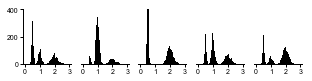

In [77]:
ambiguity = 0.1

# create figure
fig = plt.figure(figsize=(num_replicates*1, 1))
gs = GridSpec(1, num_replicates, wspace=0.2, hspace=0.)
axes = [fig.add_subplot(gs[i]) for i in range(num_replicates)]

replicate_ids = [ 0, 28, 42, 26, 19]
for j in range(num_replicates):
    
    ax = axes[j]

    # load simulation and benchmark
    simulation = sweep.batches[0, jj][replicate_ids[j]]
    benchmark = benchmarks.load_benchmark(jj, ii)

    # render image
    levels = simulation.measure(ambiguity)
    _ = ax.hist(levels.clonal_marker, bins=np.arange(0, 3, .05), color='k')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
for ax in axes:
    ax.set_ylim(0, 400)
    ax.set_xticks([0,1,2,3])

for ax in axes[1:]:
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    
#savefig(fig, 'replicate_distributions')

In [78]:
benchmark = benchmarks.load_benchmark(0, 0)

In [81]:
data = benchmark.measure()

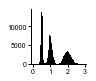

In [92]:
fig, ax = plt.subplots(figsize=(1, 1))
_ = ax.hist(data.clonal_marker.values, bins=np.arange(0, 3, .05), color='k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
_ = ax.set_xticks([0,1,2,3])

savefig(fig, 'replicate_overall_distribution')

In [93]:
from clones.annotation.bayesian import BayesianClassifier

In [95]:
model = BayesianClassifier(data.clonal_marker.values)

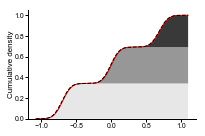

In [102]:
fig = model.plot_cdfs(log=True, rasterized=True)
savefig(fig, 'replicate_overall_fits')

### Difficult example

In [5]:
path = '../../../data/synthetic/sweeps/Sweep_181201_191516/'
sweep = Sweep.load(path)
benchmarks = SweepBenchmark.load(path)
benchmark = benchmarks.load_benchmark(0, 6)

In [6]:
savedir = './graphics/benchmarking/'
savefig = lambda fig, name: fig.savefig(join(savedir, '{:s}.pdf'.format(name)), dpi=400, rasterized=True, transparent=True)

Plot sampled fluorescence levels.

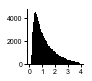

In [62]:
data = benchmark.measure()
fig, ax = plt.subplots(figsize=(1, 1))
_ = ax.hist(data.clonal_marker.values, bins=np.arange(0, 4, .05), color='k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
_ = ax.set_xticks([0,1,2,3,4])

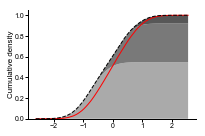

In [7]:
from clones.annotation.bayesian import BayesianClassifier
_ = benchmark.classifier.plot_cdfs(log=True, rasterized=True)

Plot generating model PDFs versus inferred model PDFs

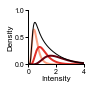

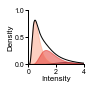

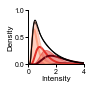

In [9]:
from growth.measure.sampling import MultiLognormalSampler
sampler = MultiLognormalSampler(benchmark.ambiguity)

fig0, ax0 = plt.subplots(figsize=(1, 1))
_ = sampler.show_pdf(ax=ax0, cmap=plt.cm.Reds, component_lw=1, include_composite=True, composite_lw=1.)

fig1, ax1 = plt.subplots(figsize=(1, 1))
benchmark.classifier.plot_pdfs(ax=ax1, cmap=plt.cm.Reds)

fig2, ax2 = plt.subplots(figsize=(1, 1))
_ = sampler.show_pdf(ax=ax2, cmap=plt.cm.Reds, component_lw=1, include_composite=True, composite_lw=1.)
benchmark.classifier.plot_pdfs(ax=ax2, cmap=plt.cm.Reds)

for ax in (ax0, ax1, ax2):
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 1.)
    ax.set_xlabel('Intensity')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
savefig(fig0, 'failure_ground_truth')
savefig(fig1, 'failure_model_fit')
savefig(fig2, 'failure_superimposed')

In [10]:
benchmark.ambiguity

0.4600000000000001

# Synthetic benchmarking

In [6]:
from clones.validation.sweep import Sweep, SweepBenchmark

path = '../../../data/synthetic/sweeps/Sweep_181201_191516/'
sweep = Sweep.load(path)
benchmarks = SweepBenchmark.load(path)

In [40]:
savedir = './graphics/benchmarking/'
savefig = lambda fig, name: fig.savefig(join(savedir, '{:s}.pdf'.format(name)), dpi=400, rasterized=True, transparent=True)

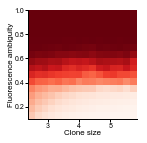

In [42]:
fig, ax = plt.subplots(figsize=(2, 2))
_ = benchmarks.results.plot_absolute_error(ax=ax, method='community', log=False, vmin=0., vmax=.5, cmap=plt.cm.Reds)
#_ = benchmarks.results.plot_relative_error(ax=ax, method='community', vmin=-3., vmax=3, cmap=plt.cm.seismic)
trends = GrowthTrends(sweep._results)
mean_clone_size = np.log(trends.means.mean_clone_size.values)
xvals = mean_clone_size[::-1]
yvals = benchmarks.ambiguities
ax.images[0].set_extent([xvals.min(), xvals.max(), yvals.max(), yvals.min()])
ax.invert_yaxis()
ax.set_aspect(xvals.ptp()/yvals.ptp())
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#savefig(fig, 'community_absolute')

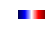

In [75]:
def plot_colorbar(length=0.5, aspect=3, cmap=plt.cm.seismic):    
    fig, ax = plt.subplots(figsize=(length, length/aspect))
    yy,xx = np.meshgrid(np.arange(0, 1, 0.01), np.arange(0, 1/aspect, 0.01))
    ax.imshow(yy, cmap=cmap, vmin=0, vmax=1)
    ax.axis('off')
    return fig

fig = plot_colorbar(cmap=plt.cm.seismic)

#savefig(fig, 'relative_colorscale')

# testing

In [84]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from clones.validation.sweep import Sweep, SweepBenchmark
%matplotlib inline

path_local = '../../../data/synthetic/sweeps/Sweep_181201_191516_local/'
sweep_local = Sweep.load(path_local)
benchmarking_local = SweepBenchmark.load(path_local)

path_global = '../../../data/synthetic/sweeps/Sweep_181201_191516_global/'
sweep_global = Sweep.load(path_global)
benchmarking_global = SweepBenchmark.load(path_global)

In [85]:
from clones.validation.growth import GrowthTrends

def plot_grid(benchmarking, method='labels_MAE', relative=False, reference='level_only_MAE', cmap=plt.cm.inferno):

    fig, ax = plt.subplots(figsize=(2, 2))
    
    if not relative:
        if 'MAE' in method:
            _ = benchmarking.results.plot_absolute_error(ax=ax, method=method, log=False, vmin=0., vmax=0.33, cmap=cmap)
        else:
            _ = benchmarking.results.plot_absolute_error(ax=ax, method=method, log=False, vmin=0., vmax=1., cmap=cmap)
            
    else:
        _ = benchmarking.results.plot_relative_error(ax=ax, method=method, reference_method=reference, vmin=-3., vmax=3, cmap=plt.cm.seismic)

    # format axis
    trends = GrowthTrends(sweep._results)
    mean_clone_size = np.log(trends.means.mean_clone_size.values)
    xvals = mean_clone_size[::-1]
    yvals = benchmarking.ambiguities
    ax.images[0].set_extent([xvals.min(), xvals.max(), yvals.max(), yvals.min()])
    ax.invert_yaxis()
    ax.set_aspect(xvals.ptp()/yvals.ptp())
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [96]:
benchmarking_local.results.data.columns

Index(['labels_MAE', 'level_only_MAE', 'spatial_only_MAE', 'community_MAE',
       'labels_PCT', 'level_only_PCT', 'spatial_only_PCT', 'community_PCT'],
      dtype='object')

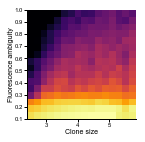

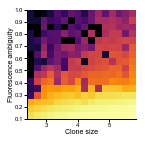

In [98]:
#fig = plot_colorbar(cmap=plt.cm.inferno, length=3)
plot_grid(benchmarking_local, method='community_MAE', relative=False, cmap=plt.cm.inferno_r)
plot_grid(benchmarking_global, method='community_MAE', relative=False, cmap=plt.cm.inferno_r)

#plot_grid(benchmarking_local, method='community_PCT', relative=False, cmap=plt.cm.inferno_r)

In [334]:
batch_id = 5
ambiguity_id = 10
job = benchmarking.load_job(batch_id, ambiguity_id)

batch = sweep.batches[0, batch_id]
simulation = batch.load_simulation(10)
data = simulation.measure(ambiguity=job.ambiguity)
graph = job.build_graph(data)